In [1]:
# import the packages we need 
import numpy as np
import matplotlib.pyplot as plt

# Question 3

## (a)

Write a python code to evaluate the Lebesgue function (1) associated to a given set of pairwise distinct nodes


In [2]:
def lebesgue(x, xn):      #This function compute the Lebesgue function at x. x is the coordinate of a point and xn denotes the nodes
    l = 0
    for i in range(len(xn)):
        num = np.prod(x-xn[:i])*np.prod(x-xn[i+1:])
        den = np.prod(xn[i]-xn[:i])*np.prod(xn[i]-xn[i+1:])
        l += np.abs(num/den)
    return l

## (b)

Lambda_n = 2.20782, for n = 4
Lambda_n = 29.8981, for n = 10
Lambda_n = 10979.2, for n = 20


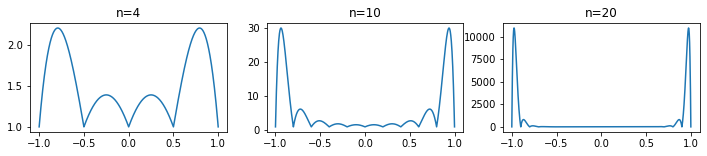

In [3]:
ns = (4,10,20)  # test n
fig, ax = plt.subplots(1,len(ns),figsize=(12,2))  # figure

for axi, n in zip(ax, ns):
    xn = -1 + (2/n)*np.arange(n+1)  # nodes
    xk = -1 + (2/1000)*np.arange(1001)  # estimated nodes
    
    # compute lebesgue function
    Ln = np.zeros(len(xk))
    for i in range(len(xk)):
        Ln[i] = lebesgue(xk[i], xn)
    
    # plot Ln
    axi.plot(xk, Ln)
    axi.set_title("n=%d"%n)
    
    # estimate Lambdan
    Lambdan = max(Ln)
    print("Lambda_n = %g, for n = %d"%(Lambdan, n))

plt.show()

# Question 4

In [4]:
def baryweigths(xn): # Barycentric weights for aribitrary nodes xn. xn denotes the nodes.
    weights = np.ones(len(xn))   
    
    for i in range(1, len(xn)):
        for j in range(i):
            weights[j] = weights[j]/(xn[j]-xn[i])
        weights[i] = 1/np.prod(xn[i]-xn[:i])
    
    return weights

def barycentric(x, xn, yn, weights):   # Compute the Barycentric Formula. x denotes the x coordinate of a point, xn denotes the nodes, yn denotes the values of the nodes, and weights refer to the Barycentric weights.
    if np.any(x==xn):
       return yn[x==xn]
    else:
        t = weights/(x-xn)
        return sum(t*yn)/sum(t)     # Return the value of the interpolating polynomial at x 

Now, we test our implementation by comparing the results in Question 2.

In [5]:
xn = np.array([-2,0,1])  # nodes
yn = np.array([0,1,-1])

weights = baryweigths(xn)  # weights

print(barycentric(-1, xn, yn, weights),'==',4/3)

1.3333333333333333 == 1.3333333333333333


We can see that it is consistent with the result from Question 2.

Use the code in (a) to find $P_5(2)$ as an approximation of $f(2)$.

In [6]:
xn = np.array([0,0.25,0.52,0.74,1.28,1.5])  # nodes
yn = np.array([0,0.7070,1,0.7071,-0.7074,-1])

weights = baryweigths(xn)  # weights

print('P5(2) = %g'%(barycentric(2, xn, yn, weights)))

P5(2) = -2.34383
